In [69]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change
import matplotlib.pyplot as plt
%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('BTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'hour', 10000, "DESC")

data_prices = candlestick.to_df()

data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices





,open,high,close,low,hour_return,day,hour
date,,,,,,,
2021-10-12 21:00:00+07:00,56948.7,57140.3,56709.0,56512.2,1.111441,2021-10-12,21
2021-10-12 20:00:00+07:00,56884.3,57450.0,56948.7,56851.0,1.053631,2021-10-12,20
2021-10-12 19:00:00+07:00,57240.1,57296.9,56884.3,56777.0,0.915688,2021-10-12,19
2021-10-12 18:00:00+07:00,57179.0,57383.0,57240.1,57037.5,0.605742,2021-10-12,18
2021-10-12 17:00:00+07:00,56942.7,57250.0,57179.0,56680.0,1.005646,2021-10-12,17
...,...,...,...,...,...,...,...
2020-08-29 02:00:00+07:00,11481.7,11522.8,11498.1,11478.1,0.389437,2020-08-29,2
2020-08-29 01:00:00+07:00,11474.4,11511.4,11481.7,11468.5,0.374068,2020-08-29,1
2020-08-29 00:00:00+07:00,11509.9,11520.9,11474.4,11462.5,0.509487,2020-08-29,0


In [70]:
def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()



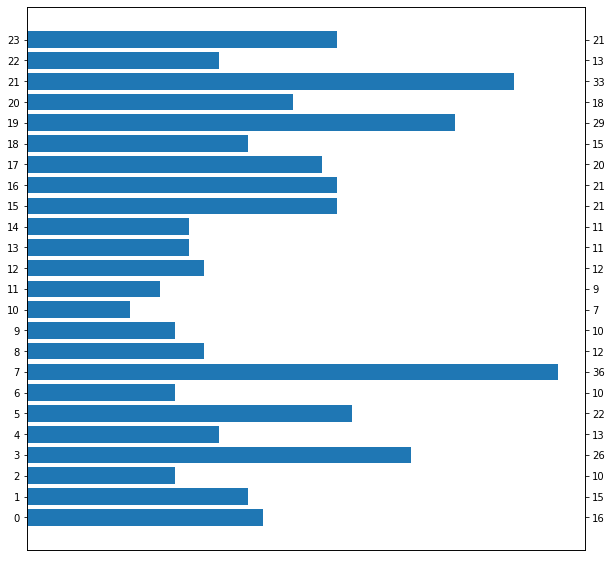

In [71]:

list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()
